In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
train_df = pd.read_csv("wat-all.csv")

In [6]:
train_df.head()

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,1
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,2261,0
2,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,359,0
3,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,2261,0
4,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,359,0


In [7]:
train_X = train_df.drop(columns=['packet_address','time','target'])

In [8]:
train_X

,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id
0,0,2,0,0,0,3,2,8,0,0,23,7,3,892
1,1,1,0,0,0,3,2,8,1,1,29,13,3,2261
2,0,2,0,0,0,3,2,8,0,0,23,7,3,359
3,5,1,3,0,0,3,2,8,1,1,29,13,3,2261
4,1,2,4,0,0,3,2,8,0,0,23,7,3,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504035,8,3,2,1,2,1,4,16,27,11,0,0,3152948,1205
504036,8,3,2,1,3,1,4,16,27,11,0,0,3152948,1205
504037,9,4,2,1,4,2,4,16,27,11,0,0,3152948,1205
504038,4,3,1,1,0,0,4,16,27,11,0,0,3152948,1205


In [9]:
x = train_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0,0.379898
1,0.066667,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0,0.962947
2,0.000000,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0,0.152896
3,0.333333,0.25,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0,0.962947
4,0.066667,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0,0.152896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504035,0.533333,0.75,0.50,0.333333,0.50,0.333333,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0,0.513203
504036,0.533333,0.75,0.50,0.333333,0.75,0.333333,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0,0.513203
504037,0.600000,1.00,0.50,0.333333,1.00,0.666667,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0,0.513203
504038,0.266667,0.75,0.25,0.333333,0.00,0.000000,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0,0.513203


In [10]:
corr_df = pd.concat([train_X, train_df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1.000000,0.311228,0.047617,-0.042331,2.395434e-03,-0.003780,0.178998,0.169018,0.297251,0.425807,-0.110032,0.016156,0.025157,-3.909674e-02,0.002485
1,0.311228,1.000000,-0.359564,-0.108256,6.052237e-03,-0.009565,0.482558,0.516584,0.509907,0.459022,-0.485092,-0.401589,-0.016820,1.032300e-02,0.003407
2,0.047617,-0.359564,1.000000,0.111575,-6.101837e-03,0.009632,-0.488682,-0.578135,-0.490140,-0.403628,0.515266,0.464305,0.016370,9.411588e-04,0.007999
3,-0.042331,-0.108256,0.111575,1.000000,8.386949e-03,-0.013272,-0.395071,-0.430033,-0.211123,-0.175386,0.210071,0.173351,0.045874,-1.038047e-02,0.007953
4,0.002395,0.006052,-0.006102,0.008387,1.000000e+00,0.079060,0.107364,0.083671,0.012444,0.010379,-0.012476,-0.010481,-0.000023,6.820495e-07,-0.000004
5,-0.003780,-0.009565,0.009632,-0.013272,7.906039e-02,1.000000,-0.169743,-0.132280,-0.019663,-0.016404,0.019717,0.016574,-0.000024,1.053269e-05,0.000019
6,0.178998,0.482558,-0.488682,-0.395071,1.073640e-01,-0.169743,1.000000,0.977135,0.930521,0.768846,-0.931435,-0.773016,-0.041155,9.316068e-03,-0.007137
7,0.169018,0.516584,-0.578135,-0.430033,8.367094e-02,-0.132280,0.977135,1.000000,0.902311,0.735741,-0.914002,-0.765335,-0.045096,1.159423e-02,-0.008493
8,0.297251,0.509907,-0.490140,-0.211123,1.244433e-02,-0.019663,0.930521,0.902311,1.000000,0.925837,-0.935948,-0.776937,-0.023179,-5.824007e-03,-0.004519
9,0.425807,0.459022,-0.403628,-0.175386,1.037869e-02,-0.016404,0.768846,0.735741,0.925837,1.000000,-0.773110,-0.641794,-0.002794,-2.545835e-02,-0.001668


In [11]:
train_Y = train_df['target']

In [12]:
train_Y

0         1
1         0
2         0
3         0
4         0
         ..
504035    1
504036    1
504037    1
504038    1
504039    1
Name: target, Length: 504040, dtype: int64

In [13]:
model = Sequential()

In [14]:
n_cols = train_X.shape[1]
n_cols

14

In [15]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [20]:
early_stopping_monitor = EarlyStopping(patience=20)

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.70976983, -0.30256686,  0.5625034 , ...,  0.59180449,
        -0.2500026 , -0.10373356],
       [-0.92900455, -0.27575105,  0.59820052, ...,  0.63172852,
        -0.3748822 ,  0.54920917],
       [-0.71039771, -0.30538929,  0.51702793, ...,  0.60664799,
        -0.32670836, -0.30636617],
       ...,
       [ 1.09518458,  0.52966508, -0.66684601, ...,  0.10928375,
         0.27870327,  0.14695868],
       [ 1.06930523, -0.50242002, -0.17903966, ...,  0.0156443 ,
         0.11929607,  0.18611297],
       [ 1.06586005, -0.20939815, -0.23565379, ...,  0.07345195,
         0.12245066,  0.18678033]])

In [24]:
pca.explained_variance_ratio_

array([0.52095204, 0.07945799, 0.0733298 , 0.06675942, 0.06053617,
       0.0551926 , 0.04009319, 0.03892328, 0.03432273])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

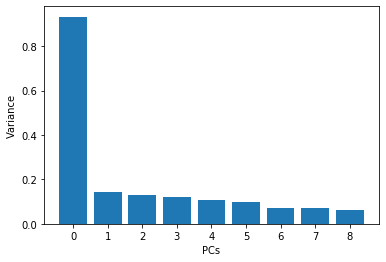

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.709770,-0.302567,0.562503,0.240608,0.779657,0.003024,0.591804,-0.250003,-0.103734
1,-0.929005,-0.275751,0.598201,0.391826,0.655477,-0.025954,0.631729,-0.374882,0.549209
2,-0.710398,-0.305389,0.517028,0.193729,0.775952,0.000873,0.606648,-0.326708,-0.306366
3,-1.075973,-0.277781,0.275460,0.695061,0.227729,-0.353010,0.646979,-0.060663,0.448579
4,-0.926192,-0.287472,0.244392,0.482234,0.235926,-0.437892,0.627470,0.183611,-0.491761
...,...,...,...,...,...,...,...,...,...
504035,1.033983,0.020426,-0.465089,-0.181757,-0.229354,-0.052336,0.053601,0.169584,0.184428
504036,1.038888,0.263618,-0.489906,-0.176130,-0.238567,-0.021640,0.028967,0.168201,0.184098
504037,1.095185,0.529665,-0.666846,-0.038042,0.065082,-0.071619,0.109284,0.278703,0.146959
504038,1.069305,-0.502420,-0.179040,-0.396903,-0.273481,0.202173,0.015644,0.119296,0.186113


In [28]:
final_df = pd.concat([principal_df, train_df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.709770,-0.302567,0.562503,0.240608,0.779657,0.003024,0.591804,-0.250003,-0.103734,1
1,-0.929005,-0.275751,0.598201,0.391826,0.655477,-0.025954,0.631729,-0.374882,0.549209,0
2,-0.710398,-0.305389,0.517028,0.193729,0.775952,0.000873,0.606648,-0.326708,-0.306366,0
3,-1.075973,-0.277781,0.275460,0.695061,0.227729,-0.353010,0.646979,-0.060663,0.448579,0
4,-0.926192,-0.287472,0.244392,0.482234,0.235926,-0.437892,0.627470,0.183611,-0.491761,0
...,...,...,...,...,...,...,...,...,...,...
504035,1.033983,0.020426,-0.465089,-0.181757,-0.229354,-0.052336,0.053601,0.169584,0.184428,1
504036,1.038888,0.263618,-0.489906,-0.176130,-0.238567,-0.021640,0.028967,0.168201,0.184098,1
504037,1.095185,0.529665,-0.666846,-0.038042,0.065082,-0.071619,0.109284,0.278703,0.146959,1
504038,1.069305,-0.502420,-0.179040,-0.396903,-0.273481,0.202173,0.015644,0.119296,0.186113,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,9.309896e-15,1.074738e-14,-5.663994e-16,-8.803458e-15,-7.881656e-15,2.928622e-15,1.500928e-15,-1.225931e-15,-0.006784
1,9.309896e-15,1.000000e+00,-1.111394e-15,-2.695383e-16,7.452213e-16,3.576386e-15,-1.005026e-15,-3.605677e-16,6.994417e-16,-0.004627
2,1.074738e-14,-1.111394e-15,1.000000e+00,1.951166e-15,-4.377827e-15,-3.385997e-15,1.561215e-15,4.434152e-15,2.487012e-16,-0.069337
3,-5.663994e-16,-2.695383e-16,1.951166e-15,1.000000e+00,4.672479e-15,4.915293e-15,-1.414463e-15,-5.697579e-15,1.383104e-15,-0.069335
4,-8.803458e-15,7.452213e-16,-4.377827e-15,4.672479e-15,1.000000e+00,-7.156466e-15,1.037284e-15,1.034679e-14,-3.396734e-15,-0.002902
5,-7.881656e-15,3.576386e-15,-3.385997e-15,4.915293e-15,-7.156466e-15,1.000000e+00,4.251616e-15,1.217886e-14,-4.049006e-15,-0.001401
6,2.928622e-15,-1.005026e-15,1.561215e-15,-1.414463e-15,1.037284e-15,4.251616e-15,1.000000e+00,3.993688e-15,-2.591763e-15,0.013144
7,1.500928e-15,-3.605677e-16,4.434152e-15,-5.697579e-15,1.034679e-14,1.217886e-14,3.993688e-15,1.000000e+00,7.119491e-15,-0.068279
8,-1.225931e-15,6.994417e-16,2.487012e-16,1.383104e-15,-3.396734e-15,-4.049006e-15,-2.591763e-15,7.119491e-15,1.000000e+00,-0.222283
target,-6.784181e-03,-4.626786e-03,-6.933698e-02,-6.933465e-02,-2.901904e-03,-1.400564e-03,1.314437e-02,-6.827920e-02,-2.222828e-01,1.000000


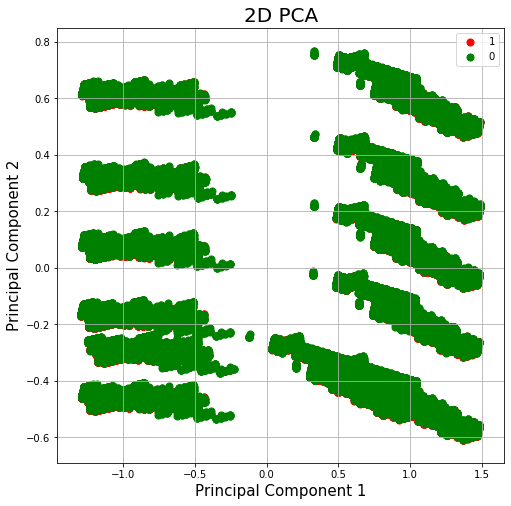

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
sns.pairplot(final_df.loc[:,final_df.dtypes == 'float64'])

In [34]:
corr_df[corr_df.duplicated()].shape

(0, 15)

In [35]:
dup_df = train_df.drop(columns=['packet_address_id','packet_address','time'])
dup_df

,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,target
0,0,2,0,0,0,3,2,8,0,0,23,7,3,1
1,1,1,0,0,0,3,2,8,1,1,29,13,3,0
2,0,2,0,0,0,3,2,8,0,0,23,7,3,0
3,5,1,3,0,0,3,2,8,1,1,29,13,3,0
4,1,2,4,0,0,3,2,8,0,0,23,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504035,8,3,2,1,2,1,4,16,27,11,0,0,3152948,1
504036,8,3,2,1,3,1,4,16,27,11,0,0,3152948,1
504037,9,4,2,1,4,2,4,16,27,11,0,0,3152948,1
504038,4,3,1,1,0,0,4,16,27,11,0,0,3152948,1


In [36]:
dup_df[dup_df.duplicated()].shape

(0, 14)

In [37]:
dup_df[dup_df.duplicated()].count()

router         0
outport        0
inport         0
packet_type    0
flit_id        0
flit_type      0
vnet           0
vc             0
src_ni         0
src_router     0
dst_ni         0
dst_router     0
enq_time       0
target         0
dtype: int64

In [ ]:
model.fit(principal_df, train_Y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

In [ ]:
pred = model.predict(principal_df)

In [ ]:
for i in range(100):
    print("%s, %s" % (pred[i], train_Y[i]))